In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Product_data.csv')

In [6]:
print(df.head(70))

      everyday productid                 productname  quantity
0   2023-08-16   D_10006                CURD - 200 G      60.0
1   2023-08-16   D_10029  STANDARDISED MILK - 500 ml      48.0
2   2023-08-16   D_10006                CURD - 200 G      60.0
3   2023-08-16   D_10017  DOUBLE TONED MILK - 500 ml      72.0
4   2023-08-16   D_10033         TONED MILK - 500 ml      24.0
..         ...       ...                         ...       ...
65  2023-08-16   D_10033         TONED MILK - 500 ml      96.0
66  2023-08-16   D_10150                CURD - 140 G      85.0
67  2023-08-16   D_10009                CURD - 500 g      24.0
68  2023-08-16   D_10029  STANDARDISED MILK - 500 ml     120.0
69  2023-08-16   D_10033         TONED MILK - 500 ml      72.0

[70 rows x 4 columns]


In [13]:
df.shape

(2516944, 4)

In [14]:
# Cleaning the dataset
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
everyday       0
productid      0
productname    0
quantity       0
dtype: int64


In [15]:
# Check the data types of each column
print("\nData types:")
print(df.dtypes)


Data types:
everyday        object
productid       object
productname     object
quantity       float64
dtype: object


In [16]:
# Filter for product ID D_10006
df_filtered = df[df['productid'] == 'D_10006']

# Group by date and sum quantity
df_grouped = df_filtered.groupby('everyday')['quantity'].sum().reset_index()

#everyday datatype changed into datetime
df_grouped['everyday'] = pd.to_datetime(df_grouped['everyday'])

In [17]:
# Set 'date' column as the index
df_grouped.set_index('everyday', inplace=True)

In [18]:
print(df_grouped)

            quantity
everyday            
2022-10-01    8760.0
2022-10-02    9720.0
2022-10-03   11820.0
2022-10-04   12720.0
2022-10-05   11880.0
...              ...
2023-08-17    8580.0
2023-08-18    7380.0
2023-08-19    6720.0
2023-08-20    8100.0
2023-08-21    7860.0

[324 rows x 1 columns]


In [19]:
df_filtered.shape

(16024, 4)

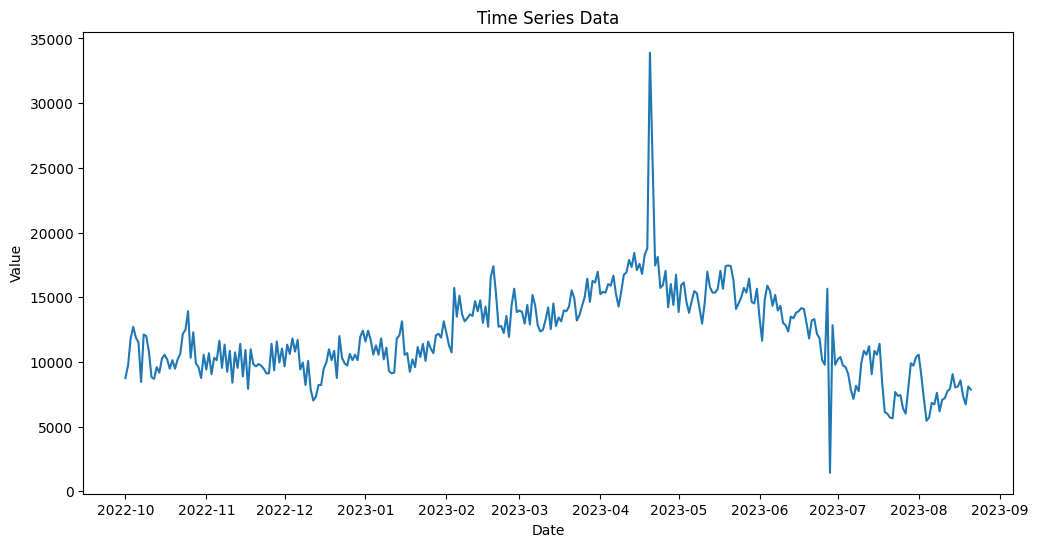

In [20]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['quantity'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [21]:
df_grouped.shape

(324, 1)

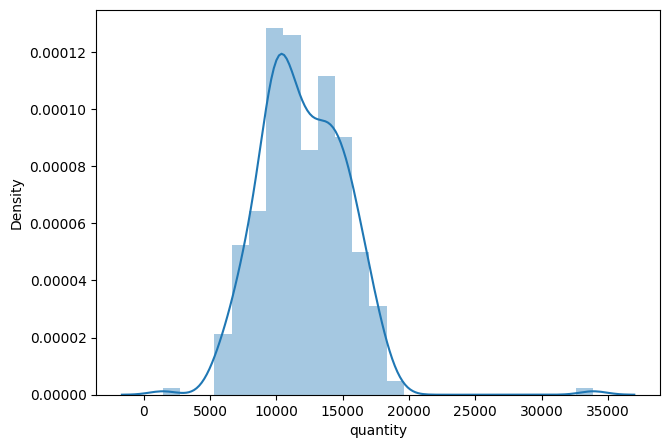

In [22]:
#detecting outlier in Quantity Columns Using Z Score Technique
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df_grouped['quantity'])
plt.show()

In [23]:
df_grouped['quantity'].skew()

0.8555494440417836

In [24]:
print("Mean vlaue of Quantity", df_grouped['quantity'].mean())
print("Std vlaue of Quantity", df_grouped['quantity'].std())
print("Min vlaue of Quantity", df_grouped['quantity'].min())
print("Max vlaue of Quantity", df_grouped['quantity'].max())

Mean vlaue of Quantity 12007.962962962964
Std vlaue of Quantity 3266.491786772356
Min vlaue of Quantity 1440.0
Max vlaue of Quantity 33900.0


In [25]:
# Finding the boundary values
print("Highest allowed", df_grouped['quantity'].mean() + 3*df_grouped['quantity'].std())
print("Lowest allowed", df_grouped['quantity'].mean() - 3*df_grouped['quantity'].std())

Highest allowed 21807.438323280032
Lowest allowed 2208.487602645895


In [26]:
# Finding the outliers
df_grouped[(df_grouped['quantity'] > 21807.43) | (df_grouped['quantity'] < 2208.48)]

,quantity
everyday,
2023-04-20,33900.0
2023-06-28,1440.0


# Approach 1 Trimming

In [27]:
new_df = df_grouped[(df_grouped['quantity'] < 21807.43) & (df_grouped['quantity'] > 2208.48)]
new_df

,quantity
everyday,
2022-10-01,8760.0
2022-10-02,9720.0
2022-10-03,11820.0
2022-10-04,12720.0
2022-10-05,11880.0
...,...
2023-08-17,8580.0
2023-08-18,7380.0
2023-08-19,6720.0


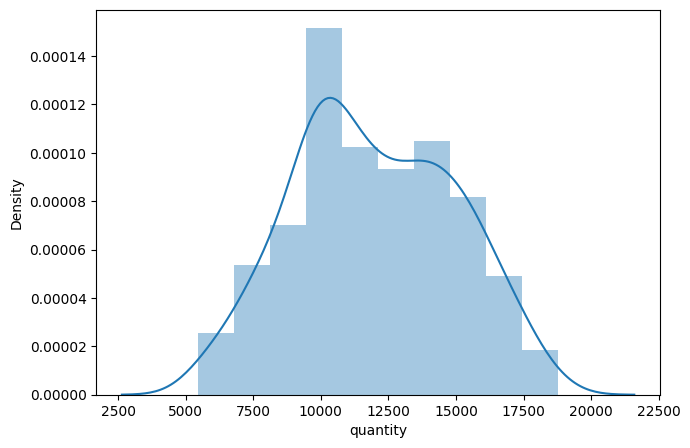

In [28]:
# Plot the time series data
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(new_df['quantity'])
plt.show()

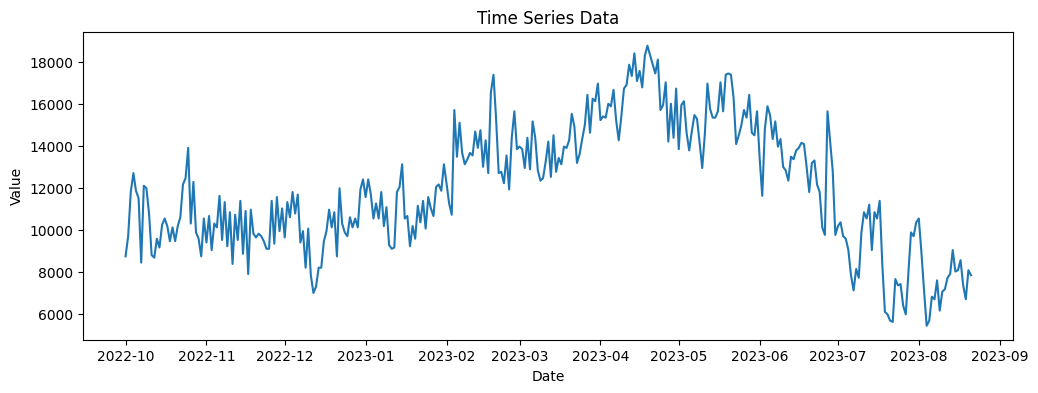

In [29]:
# Plot the time series data
plt.figure(figsize=(12, 4))
plt.plot(new_df['quantity'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Approach 2
#Capping

In [30]:
upper_limit = df_grouped['quantity'].mean() + 3*df_grouped['quantity'].std()
lower_limit = df_grouped['quantity'].mean() - 3*df_grouped['quantity'].std()

In [31]:
upper_limit

21807.438323280032

In [32]:
lower_limit

2208.487602645895

In [33]:
df_grouped['quantity'] = np.where(
    df_grouped['quantity']>upper_limit,
    upper_limit,
    np.where(
        df_grouped['quantity']<lower_limit,
        lower_limit,
        df_grouped['quantity']
    )
)

In [34]:
df_grouped.shape

(324, 1)

In [35]:
df_grouped['quantity'].describe()

count      324.000000
mean     11973.012117
std       3071.450670
min       2208.487603
25%       9720.000000
50%      11820.000000
75%      14340.000000
max      21807.438323
Name: quantity, dtype: float64

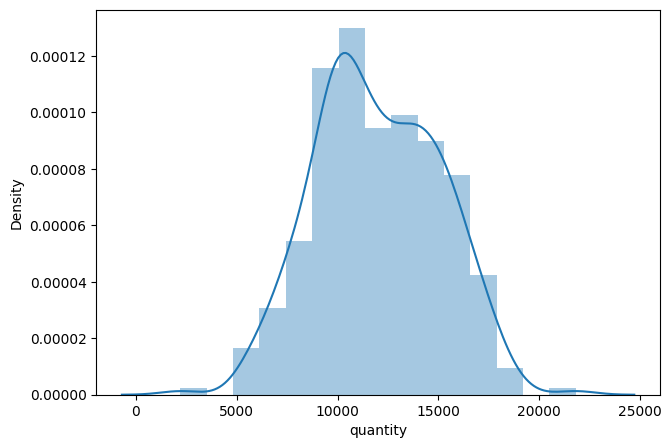

In [36]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df_grouped['quantity'])
plt.show()

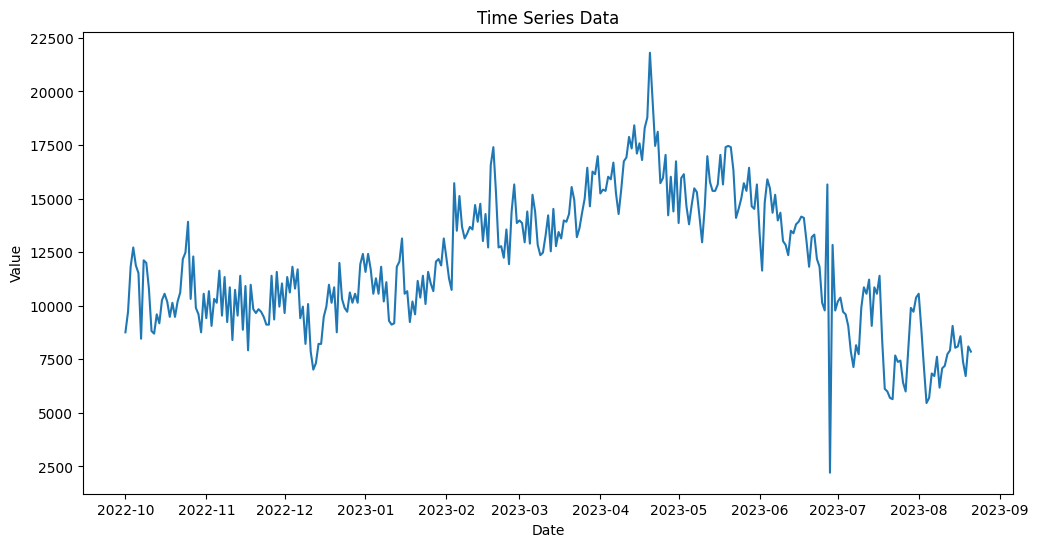

In [37]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['quantity'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [38]:
# Try different period values based on assumed seasonality
periods_to_try = [7, 30, 60]  # Daily, monthly, yearly patterns

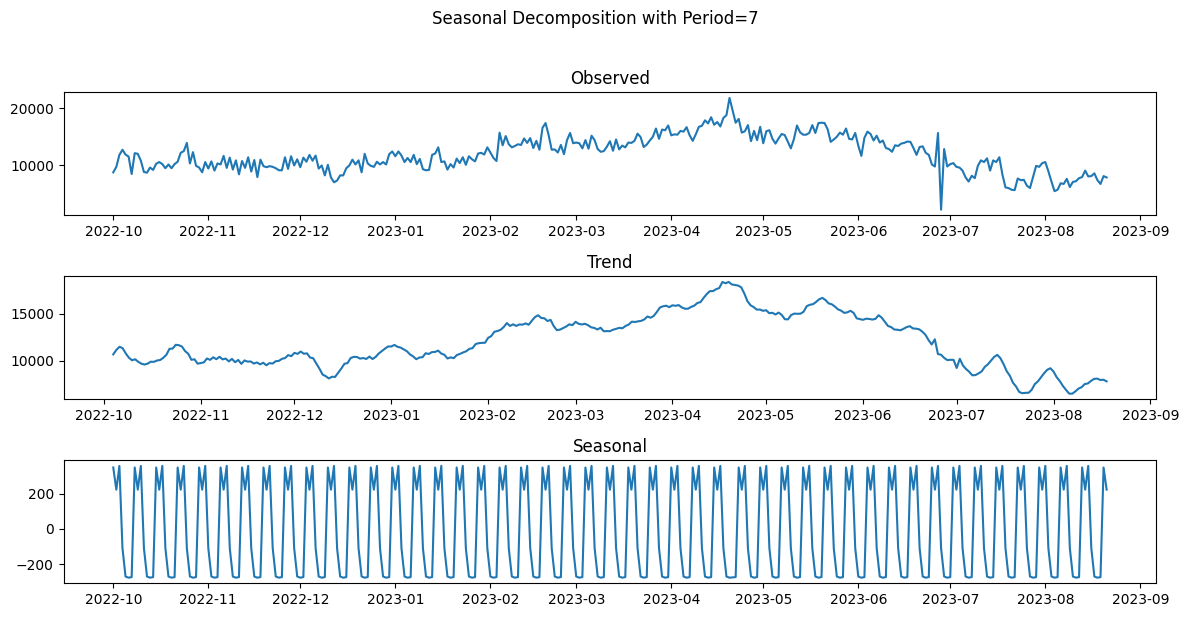

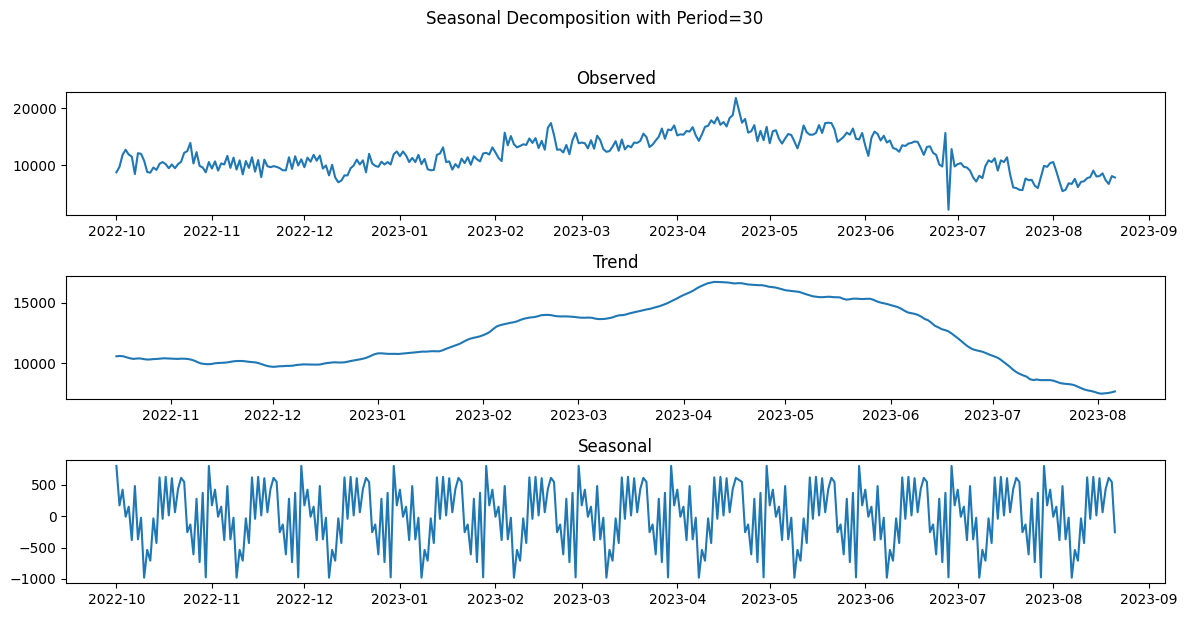

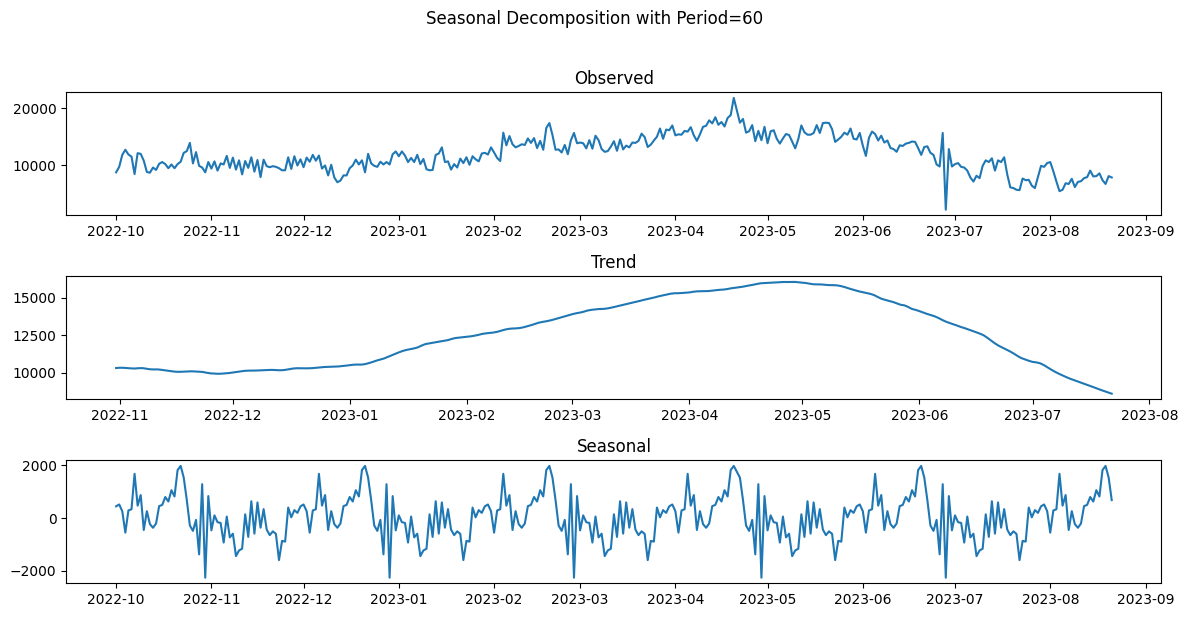

In [39]:
for period_value in periods_to_try:
    result = seasonal_decompose(df_grouped['quantity'], model='additive', period=period_value)
    
    # Plot the decomposed components
    plt.figure(figsize=(12, 6))
    plt.suptitle(f'Seasonal Decomposition with Period={period_value}', y=1.02)

    plt.subplot(3, 1, 1)
    plt.plot(result.observed)
    plt.title('Observed')

    plt.subplot(3, 1, 2)
    plt.plot(result.trend)
    plt.title('Trend')

    plt.subplot(3, 1, 3)
    plt.plot(result.seasonal)
    plt.title('Seasonal')

    plt.tight_layout()
    plt.show()

In [41]:
# Testing for Stationarity
from statsmodels.tsa.stattools import adfuller

In [43]:
test_result = adfuller(df_grouped['quantity'])

In [44]:
# H0: It is non stationary
# H1: It is stationary

def adfuller_test(quantity):
    result = adfuller(quantity)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of observations Uesd']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
        if result[1] <= 0.05:
            print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
        else:
            print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

In [45]:
adfuller_test(df_grouped['quantity'])

ADF Test Statistic : -0.9769242644401889
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary
p-value : 0.7615873368870285
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary
#Lags Used : 16
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary
Number of observations Uesd : 307
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


Differencing

In [47]:
df_grouped['qauntity First Difference'] = df_grouped['quantity'] - df_grouped['quantity'].shift(1)

In [48]:
df_grouped['quantity'].shift(1)

everyday
2022-10-01        NaN
2022-10-02     8760.0
2022-10-03     9720.0
2022-10-04    11820.0
2022-10-05    12720.0
               ...   
2023-08-17     8100.0
2023-08-18     8580.0
2023-08-19     7380.0
2023-08-20     6720.0
2023-08-21     8100.0
Name: quantity, Length: 324, dtype: float64

In [51]:
df_grouped['Seasonal First Difference'] = df_grouped['quantity'] - df_grouped['quantity'].shift(12)

In [52]:
df_grouped.head(14)

,quantity,qauntity First Difference,Seasonal First Difference
everyday,,,
2022-10-01,8760.0,NaN,NaN
2022-10-02,9720.0,NaN,NaN
2022-10-03,11820.0,NaN,NaN
2022-10-04,12720.0,NaN,NaN
2022-10-05,11880.0,NaN,NaN
2022-10-06,11520.0,NaN,NaN
2022-10-07,8460.0,NaN,NaN
2022-10-08,12120.0,NaN,NaN
2022-10-09,12000.0,NaN,NaN


In [54]:
# Again test dickey fuller test
adfuller_test(df_grouped['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.351016153616662
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
p-value : 0.01274647072710634
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
#Lags Used : 13
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
Number of observations Uesd : 298
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='everyday'>

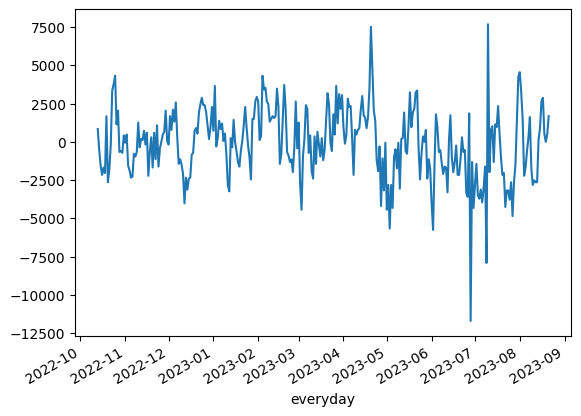

In [56]:
df_grouped['Seasonal First Difference'].plot()

Auto Regressive Modle

In [114]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm

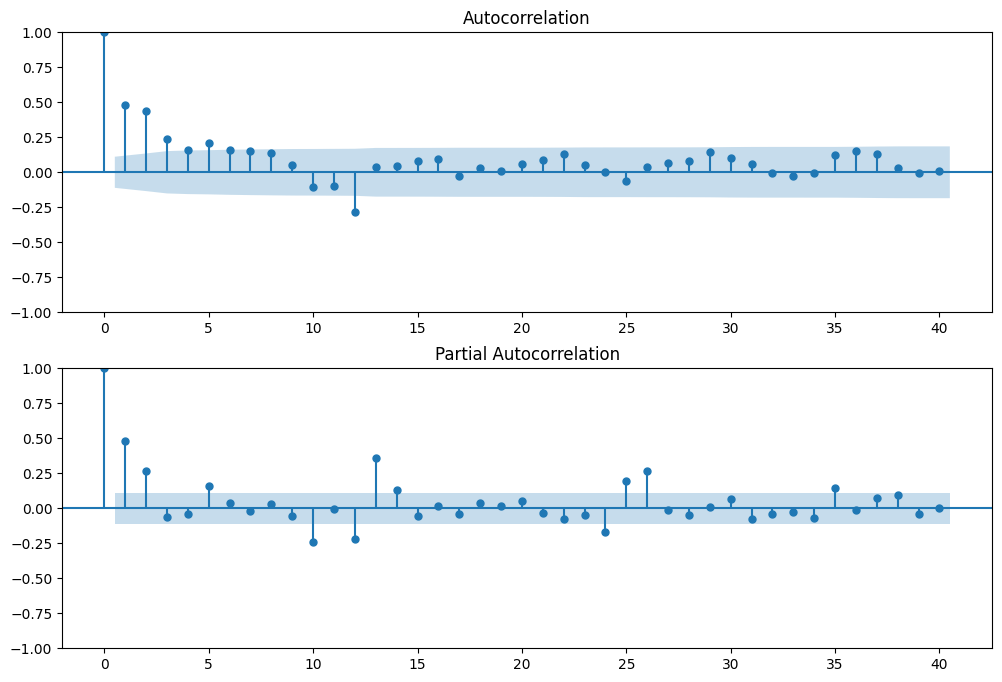

In [115]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_grouped['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_grouped['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [125]:
# for non-seasonal data
#p=1 d=1, q=0
from statsmodels.tsa.arima_model import ARIMA

In [126]:
# Define the order for ARIMA model (p, d, q)
p, d, q = 1, 1, 1

# Create ARIMA model
model = sm.tsa.ARIMA(df_grouped['quantity'], order=(p, d, q))

# Fit the model
model_fit = model.fit()

# Display the summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               quantity   No. Observations:                  324
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2811.655
Date:                Sun, 04 Feb 2024   AIC                           5629.311
Time:                        05:09:58   BIC                           5640.644
Sample:                             0   HQIC                          5633.835
                                - 324                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4602      0.081     -5.697      0.000      -0.619      -0.302
ma.L1         -0.0726      0.099     -0.731      0.465      -0.268       0.122
sigma2      2.059e+06   9.61e+04     21.429      0.0

In [127]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               quantity   No. Observations:                  324
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2811.655
Date:                Sun, 04 Feb 2024   AIC                           5629.311
Time:                        05:09:58   BIC                           5640.644
Sample:                             0   HQIC                          5633.835
                                - 324                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4602      0.081     -5.697      0.000      -0.619      -0.302
ma.L1         -0.0726      0.099     -0.731      0.465      -0.268       0.122
sigma2      2.059e+06   9.61e+04     21.429      0.000    1.87e+06    2.25e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               845.15
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               1.86   Skew:                            -0.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='everyday'>

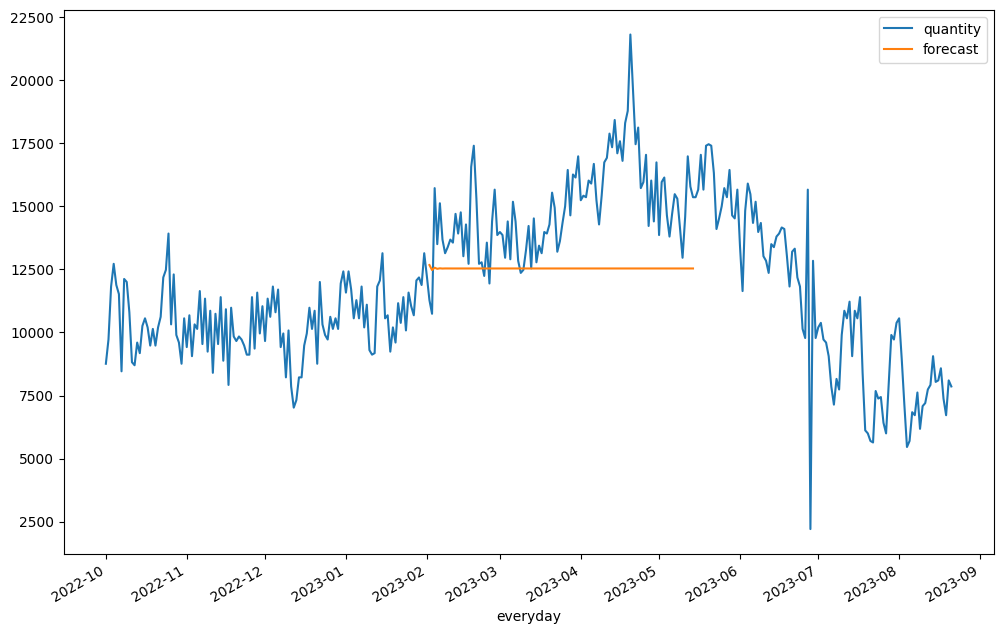

In [128]:
df_grouped['forecast'] = model_fit.predict(start=124,end=224,dynamic=True)
df_grouped[['quantity', 'forecast']].plot(figsize=(12,8))

In [129]:
import statsmodels.api as sm

In [130]:
model=sm.tsa.statespace.SARIMAX(df_grouped['quantity'], order=(1, 1, 1), seasonal_order=(1,1,1,12))
results=model.fit()

<Axes: xlabel='everyday'>

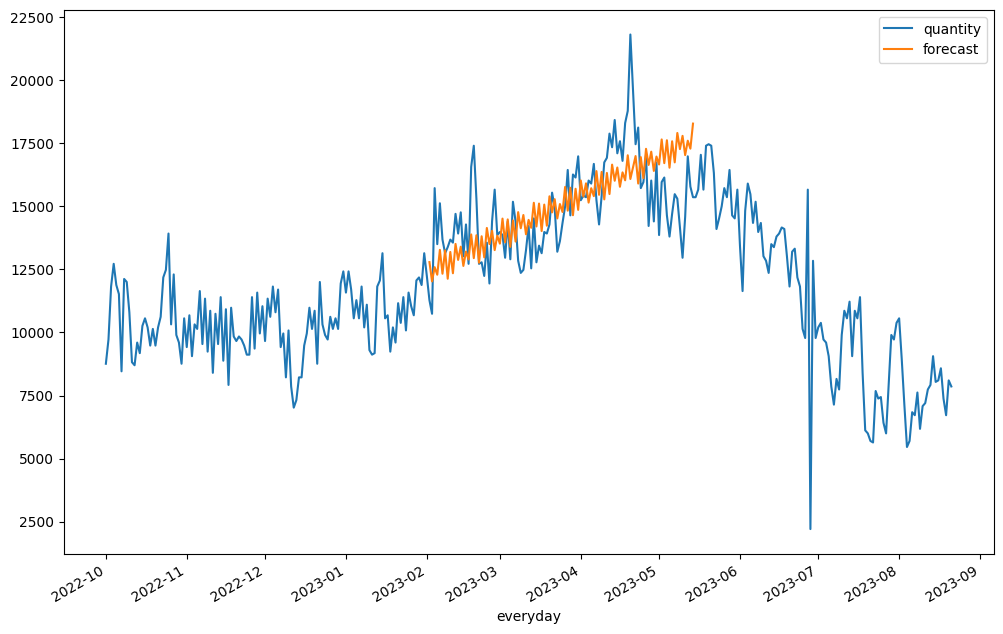

In [131]:
df_grouped['forecast']=results.predict(start=124,end=224,dynamic=True)
df_grouped[['quantity', 'forecast']].plot(figsize=(12,8))

In [136]:
from pandas.tseries.offsets import DateOffset
future_dataset=[df_grouped.index[-1]+ DataOffset(months=x)for x in range(0,24)]

NameError: name 'DataOffset' is not defined